<a href="https://colab.research.google.com/github/OseiasBeu/FormacaoMachineLearningAvancada/blob/main/Deep_Learning_Previsao_Com_Keras/curso_deep_learning_previs%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Exploração

In [2]:
passageiros = pd.read_csv(r'https://raw.githubusercontent.com/OseiasBeu/FormacaoMachineLearningAvancada/main/Deep_Learning_Previsao_Com_Keras/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

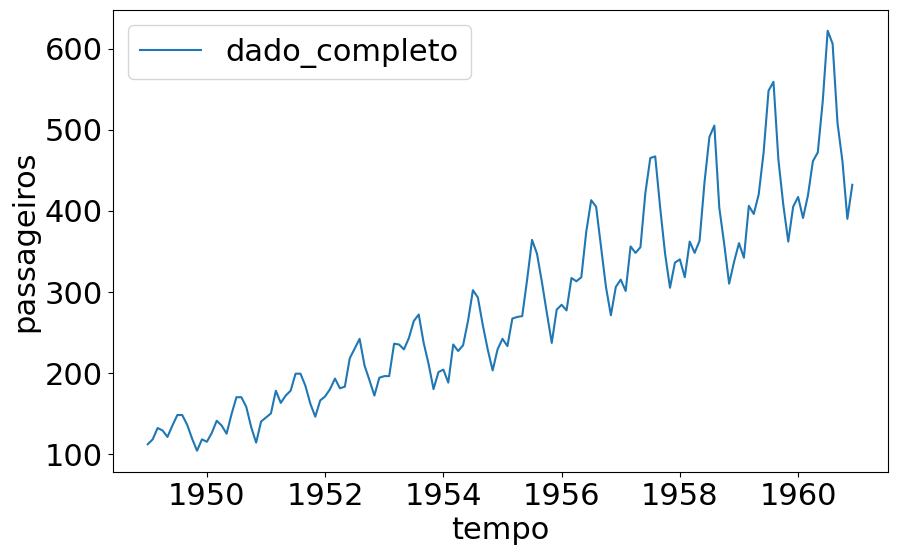

In [4]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')

# Pré processamento

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
X = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

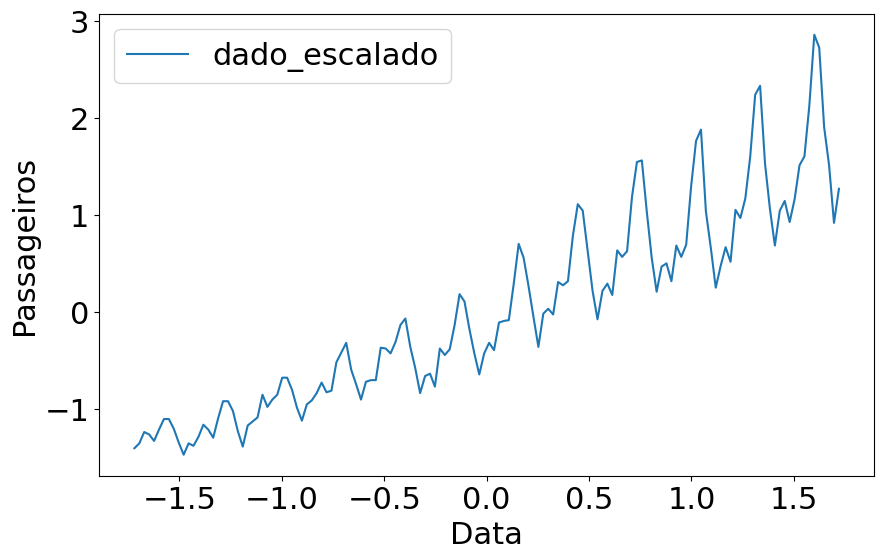

In [9]:
sns.lineplot(x=X, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [10]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [11]:
xtreino = X[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = X[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

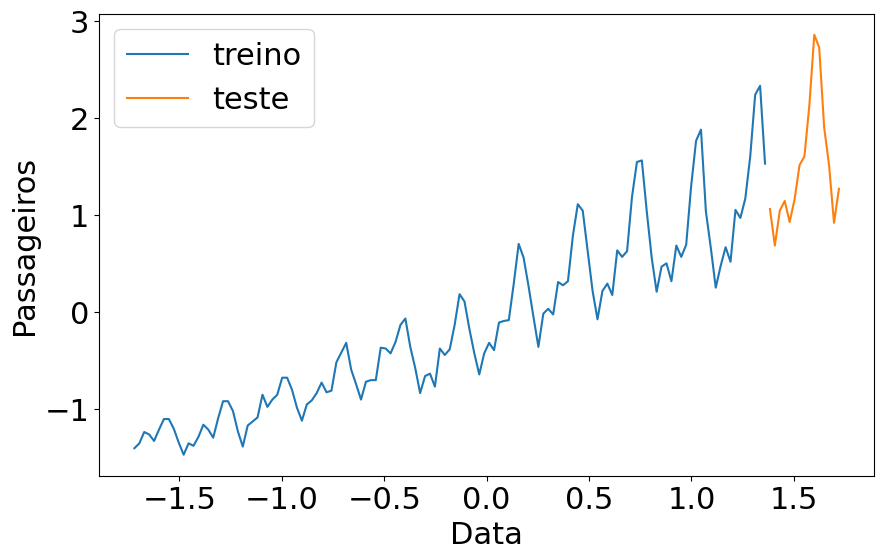

In [12]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Data')

# Regressão linear

In [13]:
# y = ax +b
regressor = Sequential()
regressor.add(Dense(units=1,
                    input_dim=1,
                    kernel_initializer='Ones',
                    activation='linear',
                    use_bias=False
                    ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
regressor.fit(xtreino, ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1368


In [17]:
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Text(0.5, 0, 'Data')

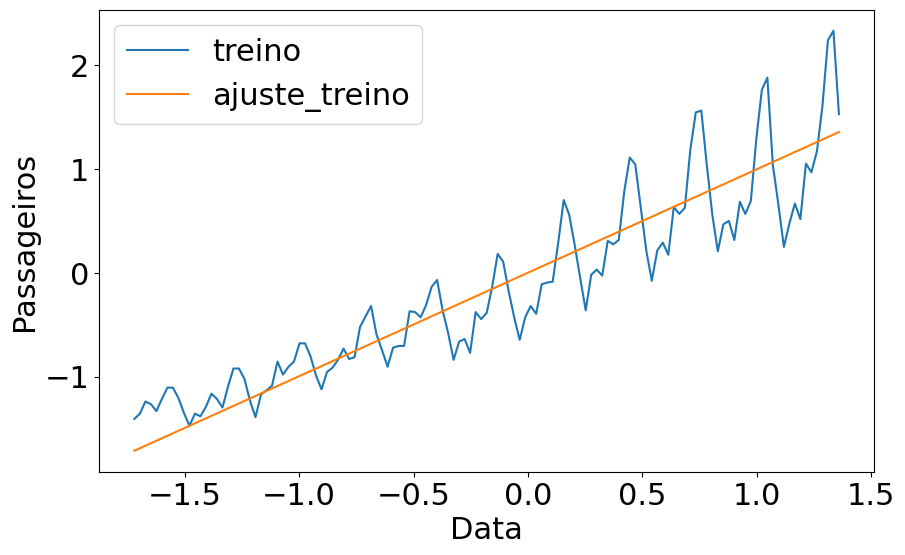

In [18]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

plt.ylabel('Passageiros')
plt.xlabel('Data')

In [19]:
d = {"tempo": xtreino,
     "passageiros": ytreino,
     "ajuste": y_predict[:,0]
     }
resultados = pd.DataFrame(data=d)

In [20]:
resultados

,tempo,passageiros,ajuste
0,-1.720064,-1.407779,-1.714384
1,-1.696007,-1.357590,-1.690406
2,-1.671950,-1.240483,-1.666429
3,-1.647894,-1.265578,-1.642452
4,-1.623837,-1.332496,-1.618474
...,...,...,...
124,1.262984,1.168570,1.258813
125,1.287041,1.603538,1.282791
126,1.311098,2.239260,1.306768
127,1.335155,2.331272,1.330745


In [21]:
resultado_transf = sc.inverse_transform(resultados[['tempo', 'ajuste']])

In [22]:
resultado_transf = pd.DataFrame(resultado_transf)

In [23]:
resultado_transf.columns = ['tempo', 'passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

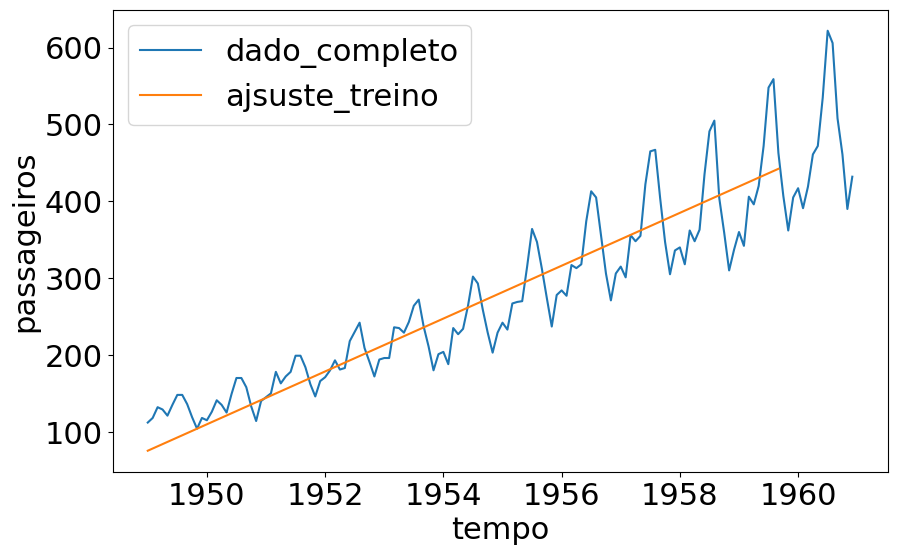

In [24]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')

In [25]:
y_predict_teste = regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [26]:
d = {'tempo':xteste, 'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [27]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)


In [28]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [29]:
resultado_transf_teste.columns = ['tempo', 'passageiros']

In [30]:
resultado_transf_teste

,tempo,passageiros
0,1959.750000,445.120905
1,1959.833333,447.987395
2,1959.916667,450.853855
3,1960.000000,453.720330
4,1960.083333,456.586806
5,1960.166667,459.453281
6,1960.250000,462.319756
7,1960.333333,465.186231
8,1960.416667,468.052706
9,1960.500000,470.919181


<Axes: xlabel='tempo', ylabel='passageiros'>

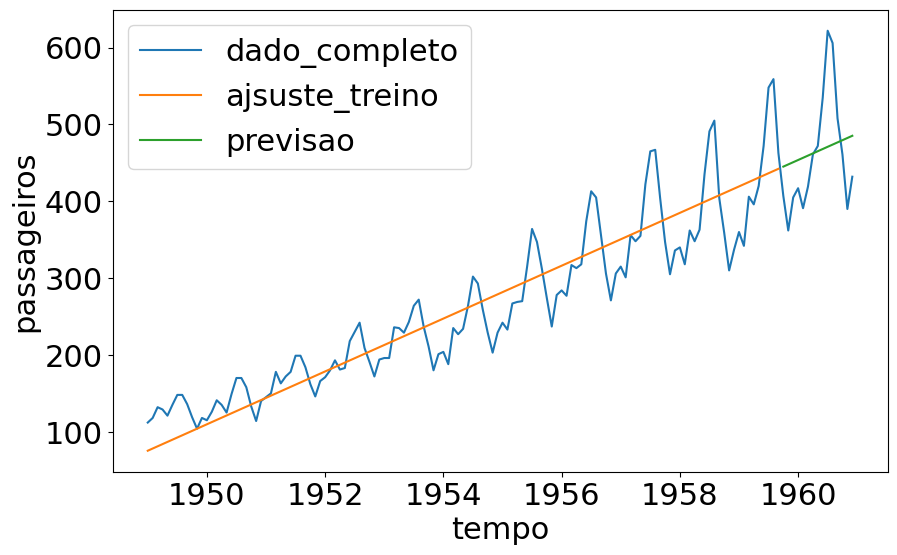

In [31]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf,label='ajsuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste,label='previsao')

In [32]:
# z = w1*x1+b

In [33]:
regressor2 = Sequential()

In [34]:
regressor2.add(Dense(units=8,
                    input_dim=1,
                    kernel_initializer='random_uniform',
                    activation='sigmoid',
                    use_bias=False
                    ))

regressor2.add(Dense(8,
                     kernel_initializer='random_uniform',
                     activation='sigmoid',
                     use_bias=False))

regressor2.add(Dense(1,
                     kernel_initializer='random_uniform',
                     activation='linear',
                     use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
regressor2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
regressor2.fit(xtreino, ytreino,epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8557
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8226
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8282 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7908 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8051 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8100
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8288 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7352
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7738
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7591
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8250
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8191
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7669 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7906
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7671 
Epoch 16/500


In [38]:
y_predict = regressor2.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [39]:
y_predict_teste = regressor2.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Text(0.5, 0, 'Data')

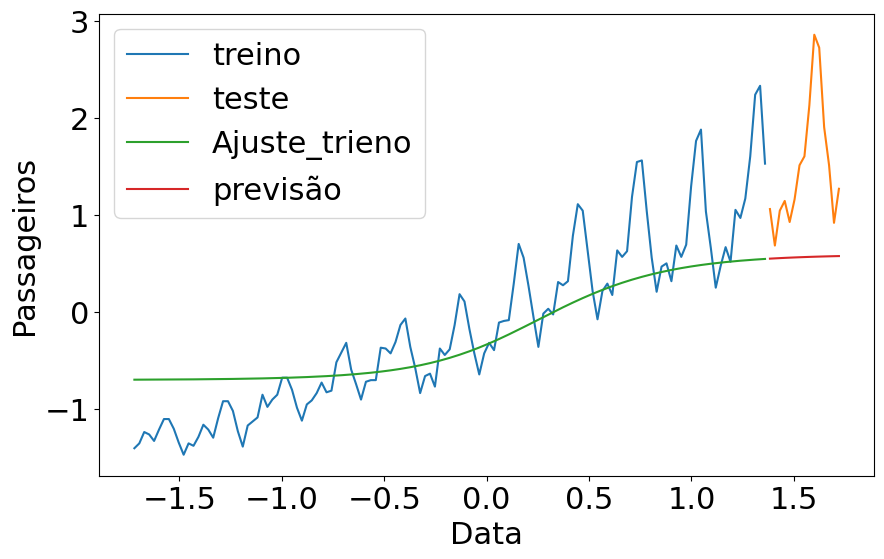

In [40]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Ajuste_trieno')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [46]:
import numpy as np

In [43]:
vetor = pd.DataFrame(ytreino)[0]

In [44]:
def separa_dados(vetor,n_passos):
  X_novo, y_novo = [],[]

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [47]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [48]:
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [49]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [50]:
vetor2 = pd.DataFrame(yteste)[0]

In [51]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [52]:
regressor3 = Sequential()

In [57]:
regressor3.add(Dense(8,input_dim=1,activation='linear',
                     kernel_initializer='ones',
                     use_bias=False))
regressor3.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform',use_bias=False))
regressor3.add(Dense(1, activation='linear', kernel_initializer='random_uniform',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
regressor3.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7122
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7256
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6297
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6781
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6905
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5944
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5770
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5516 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5473
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4611 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4076
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4190
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3709
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2774
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2747
Epoch 16/100
4/4 

In [61]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Axes: xlabel='tempo', ylabel='0'>

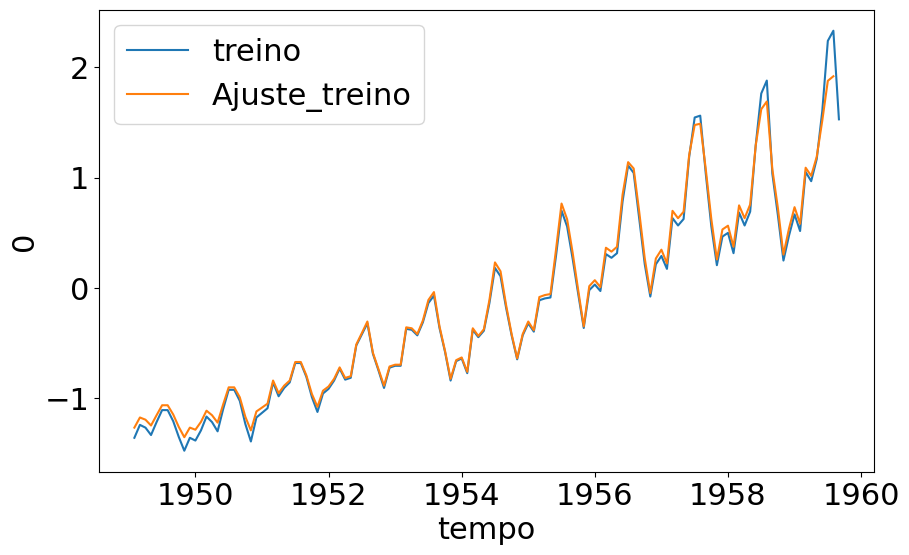

In [62]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste_treino')

In [63]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [64]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

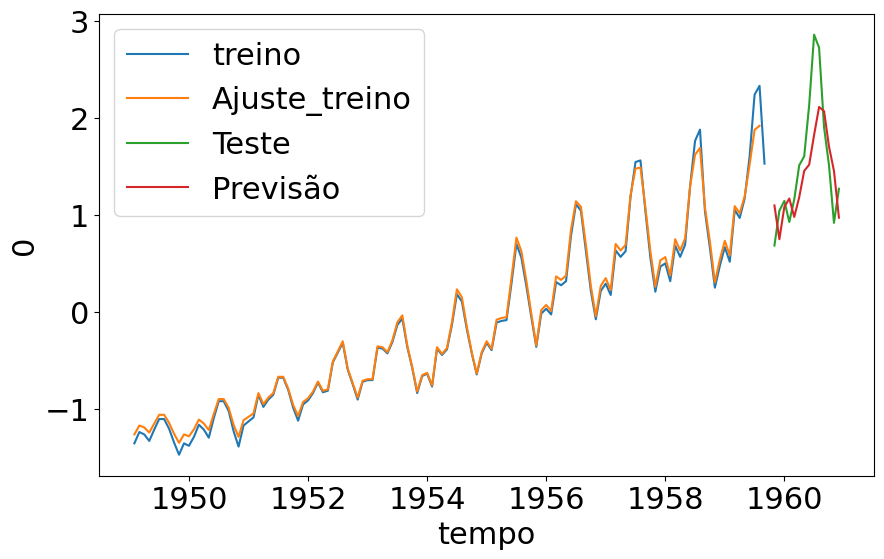

In [66]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='Ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[130:144], label='Teste')
sns.lineplot(x='tempo',y=resultado.values, data=passageiros[130:144], label='Previsão')

In [67]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [68]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [69]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [82]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [83]:
regressor4 = Sequential()

In [84]:
regressor4.add(Dense(8,input_dim=4,activation='linear',
                     kernel_initializer='ones',
                     use_bias=False))
regressor4.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform',use_bias=False))
regressor4.add(Dense(1, activation='linear', kernel_initializer='random_uniform',use_bias=False))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
regressor4.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8130 
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6680
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6501
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5128
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5012 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4284 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3973
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2972
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2583
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1929
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1718
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1590
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1399
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1326
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1523 
Epoch 16/300
4/

In [75]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [76]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_16
Received: inputs=('Tensor(shape=(11, 4))', 'Tensor(shape=(11,))')
  warnings.warn(msg)


In [77]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [78]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [88]:
# sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
# sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='Ajuste_treino')
# sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[133:144], label='Teste')
# sns.lineplot(x='tempo',y=resultado.values, data=passageiros[133:144], label='Previsão')

<Axes: xlabel='tempo'>

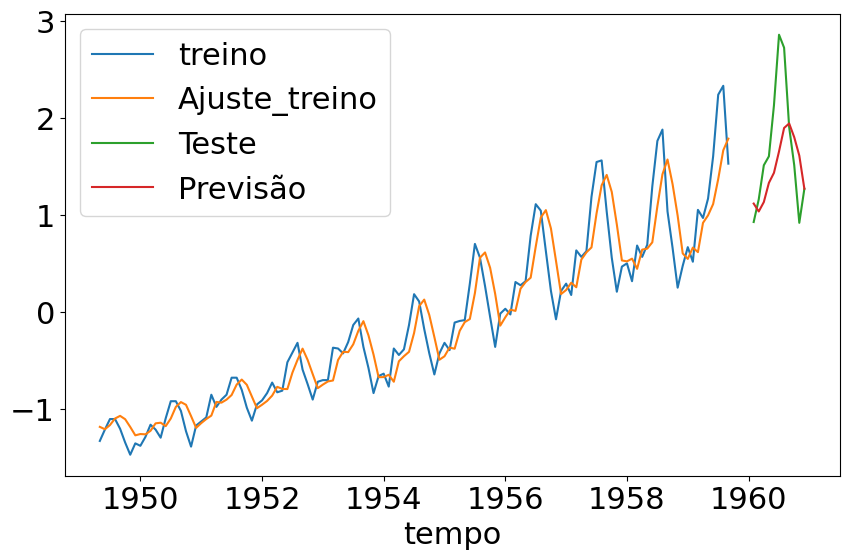

In [87]:
sns.lineplot(x='tempo',y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='Ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo, data=passageiros[133:144], label='Teste')
sns.lineplot(x='tempo',y=resultado.values, data=passageiros[133:144], label='Previsão')